# Salary Prediction

In [ ]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Reading the data from the csv file
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# finding out the shape of the dataset
data.shape

(30, 2)

In [4]:
# With the help of the info() function we can analyse the data given to us
#We are checking the data types of all the columns and also checking if there exists any NULL values in any of the columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


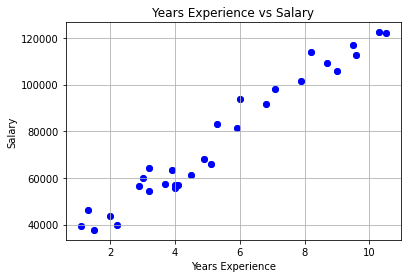

In [5]:
# Plotting a graph from the given dataset
x=data.YearsExperience
y=data.Salary
plt.scatter(x,y)
plt.title('Years Experience vs Salary')
plt.scatter(x, y, color = 'blue')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [6]:
#Initialising model for Linear Regression
model=LinearRegression()

#Initialising X and y
X = data.YearsExperience.values.reshape(data.YearsExperience.shape[0], 1)
y = data.Salary

#Fitting the values of X and Y in the Linear regression Model
model.fit(X,y)

#Printing the accuracy score of the model
model.score(X,y)

0.9569566641435086

In [7]:
# Using sklearn's train_test_split function to split the data into two subsets: training and testing

# Splitting the data into 80:20 for Training to Testing ratio for more accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=46)
print("Total number of Samples",X.shape[0])
print("\nNumber of test samples : ", X_test.shape[0])
print("Number of training samples: ",X_train.shape[0])

Total number of Samples 30

Number of test samples :  6
Number of training samples:  24


In [8]:
# Re-Initialising the Linear Regression Model
model = LinearRegression()
# Re-Fitting the model with Training Values that we split into the Linear Regression Model
model.fit(X_train, y_train)

# Since we have a liner regression problem, we will get a coefficient and
#an intercept which we will use to plot a line in the graph
print(model.coef_)
print(model.intercept_)

[9569.04556206]
25085.096390915656


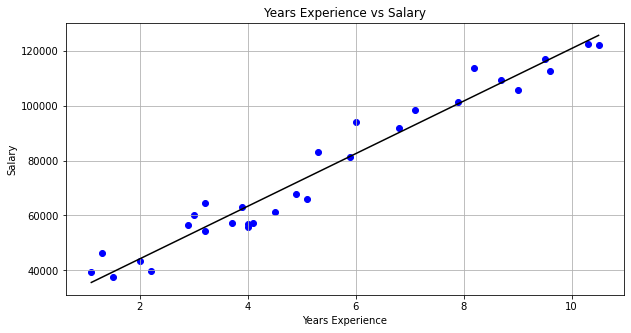

In [9]:
# We are now plotting the line in the graph by using the y=mx+c
#equation as we have found the coefficient and the intercept from the model

#y = mx+c
bestfitline = model.coef_*X + model.intercept_

#Plotting the figure
fig = plt.figure(figsize=(10,5))
plt.title('Years Experience vs Salary')
plt.grid(True)
plt.scatter(X, y, color = 'blue')
plt.plot(X, bestfitline, color = 'black')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [10]:
# Using .score() to findout the accuracy of the model as this
# automates the prediction of the data using X_test and compares it with y_test
predict = model.predict(X_test)
model.score(X_test, y_test)

0.9789129767378081

In [13]:
# Getting the MSE, RMSE and MAE using metrics from sklearn to evaluate the model.
print("Mean Squared Error = ", metrics.mean_squared_error(y_test, predict))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(y_test, predict)))
print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test, predict))
print("R Score = ", metrics.r2_score(y_test, predict))

Mean Squared Error =  20047385.839594577
Root Mean Squared Error =  4477.4307185700345
Mean Absolute Error =  3157.784891490273
R Score =  0.9789129767378081
